In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
from scipy.optimize import curve_fit
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
para_dict = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\fitNGDpara.npy', allow_pickle=True)[()]
for k in para_dict.keys():
    para_dict[k] = para_dict[k][para_dict[k]>0]
newpara_dict = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\20210331\\Analyzed_data\\fitNGDpara.npy', allow_pickle=True)[()]
for k in para_dict.keys():
    para_dict[k] = np.append(para_dict[k], newpara_dict[k][newpara_dict[k]>0])
newpara_dict = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\20210413\\Analyzed_data\\fitNGDpara.npy', allow_pickle=True)[()]
for k in para_dict.keys():
    para_dict[k] = np.append(para_dict[k], newpara_dict[k][newpara_dict[k]>0])
newpara_dict = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\20210420\\Analyzed_data\\fitNGDpara.npy', allow_pickle=True)[()]
for k in para_dict.keys():
    para_dict[k] = np.append(para_dict[k], newpara_dict[k][newpara_dict[k]>0])
newpara_dict = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\20210504\\Analyzed_data\\fitNGDpara.npy', allow_pickle=True)[()]
for k in para_dict.keys():
    para_dict[k] = np.append(para_dict[k], newpara_dict[k][newpara_dict[k]>0])

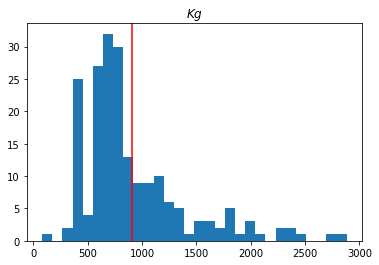

In [6]:
data = para_dict['Kg']
plt.title(r'$Kg$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

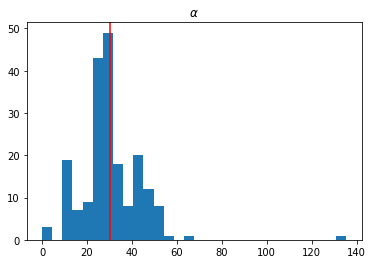

In [7]:
data = para_dict['alpha']
plt.title(r'$\alpha$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

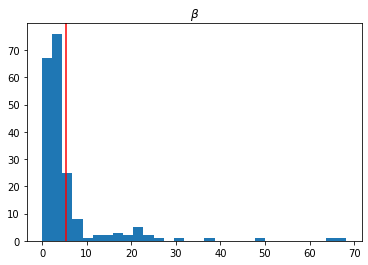

In [8]:
data = para_dict['beta']
plt.title(r'$\beta$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

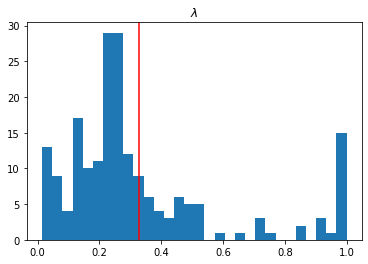

In [9]:
data = 1/(1+para_dict['beta'])
plt.title(r'$\lambda$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

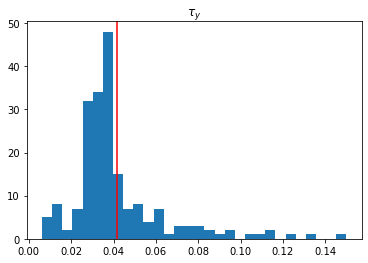

In [10]:
data = para_dict['tau_y']
plt.title(r'$\tau_y$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

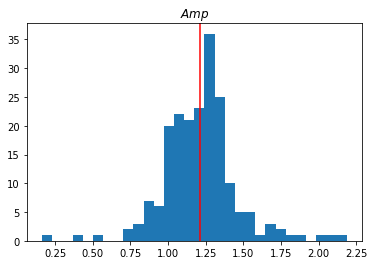

In [11]:
data = para_dict['Amp']
plt.title(r'$Amp$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

# index 1

Text(0, 0.5, '$\\beta$')

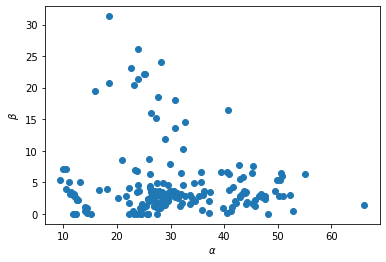

In [12]:
Index = np.where((para_dict['alpha']>1) & (para_dict['alpha']<100))
plt.scatter(para_dict['alpha'][Index], para_dict['beta'][Index])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')

Text(0, 0.5, '$Kg$')

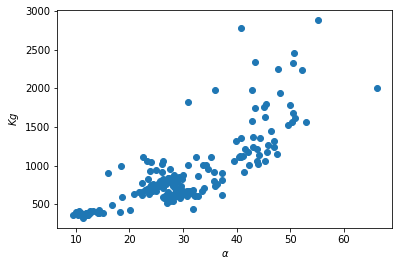

In [13]:
plt.scatter(para_dict['alpha'][Index], para_dict['Kg'][Index])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$Kg$')

Text(0, 0.5, '$Kg$')

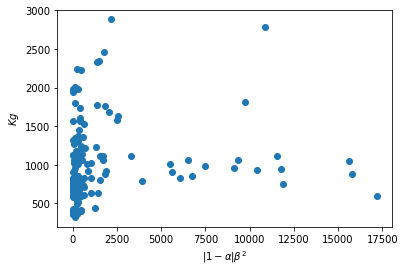

In [14]:
plt.scatter((para_dict['alpha'][Index]-1)*para_dict['beta'][Index]**2, para_dict['Kg'][Index])
plt.xlabel(r'$|1-\alpha|\beta^2$')
plt.ylabel(r'$Kg$')

# index 2

In [15]:
# theta = 500
# I1 = np.where((para_dict['alpha'][Index]-1)*para_dict['beta'][Index]**2<=theta)
# I2 = np.where((para_dict['alpha'][Index]-1)*para_dict['beta'][Index]**2>theta)

I1 = np.where((para_dict['alpha'][Index]-1)*para_dict['beta'][Index]**2<=0.5*para_dict['Kg'][Index])
I2 = np.where((para_dict['alpha'][Index]-1)*para_dict['beta'][Index]**2>0.5*para_dict['Kg'][Index])

Text(0, 0.5, '$\\beta$')

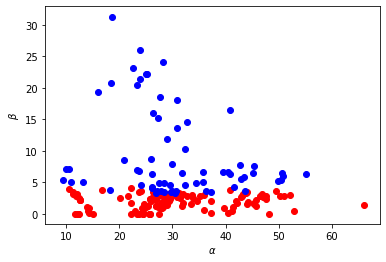

In [16]:
plt.scatter(para_dict['alpha'][Index][I1], para_dict['beta'][Index][I1], c= 'r')
plt.scatter(para_dict['alpha'][Index][I2], para_dict['beta'][Index][I2], c= 'b')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')

Text(0, 0.5, '$Kg$')

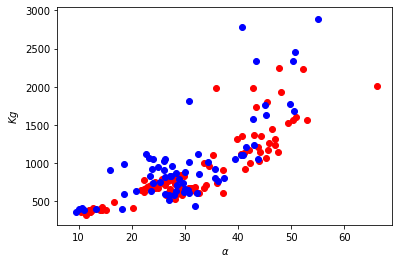

In [17]:
plt.scatter(para_dict['alpha'][Index][I1], para_dict['Kg'][Index][I1], c= 'r')
plt.scatter(para_dict['alpha'][Index][I2], para_dict['Kg'][Index][I2], c= 'b')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$Kg$')

Text(0, 0.5, '$Kg$')

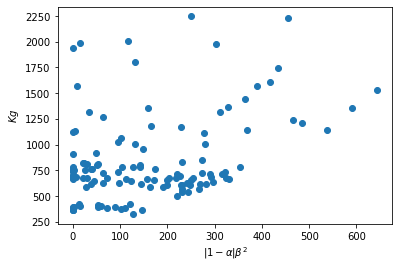

In [18]:
plt.scatter((para_dict['alpha'][Index][I1]-1)*para_dict['beta'][Index][I1]**2, para_dict['Kg'][Index][I1])
plt.xlabel(r'$|1-\alpha|\beta^2$')
plt.ylabel(r'$Kg$')

  Using cached matplotlib-3.4.2-cp37-cp37m-win_amd64.whl (7.1 MB)
Note: you may need to restart the kernel to use updated packages.
